# Introduction

The term loan refers to a type of credit vehicle in which a sum of money is lent to another party in exchange for future repayment of the value or principal amount. In many cases, the lender also adds interest or finance charges to the principal value, which the borrower must repay in addition to the principal balance. (credit: [Investopedia](https://www.investopedia.com/terms/l/loan.asp))

## Problem Statement

## About the Dataset

The used for this problem is [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset). Each Applicant is attributed with the following columns in this data set and are as follows:

| Column | Description |
| ----------- | ----------- |
| Loan_ID | Unique Loan ID |
| Gender | Male/Female |
| Married | Whether Married : Yes/No |
| Dependents | No. of people depending on the Applicant |
| Education | Graduate/Undergraduate |
| Self_Employment | Whether Self_Employment : Yes/No |
| ApplicantIncome | Applicant Income |
| CoapplicantIncome | Co-Applicant Income |
| LoanAmount | Loan Amount (in thousands) |
| Loan_Amount_Term | Loan Duration |
| Credit_History | Credit History of the Applicant |
| Property_Area | Urban/Semiurban/Rural |
| Loan_Status | Whether Loan Approved: Yes/No |

The dimensions of the dataset is 614*13

# Importing Libraries

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Dataset

In [2]:
train_path = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_path = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_path.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Pre-Processing & Data Analysis

## Missing Values

In [6]:
train_path.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

A better way to look at this is by visualizing the missing values

<Axes: >

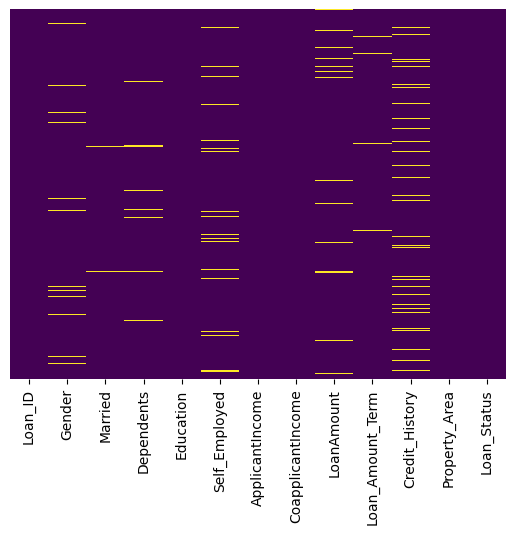

In [7]:
sns.heatmap(train_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train_path.drop(['Loan_ID'],axis=1,inplace=True)

Removing Missing Values for categorical terms with the help of mode

In [9]:
train_path ['Gender'] = train_path ['Gender'].fillna(train_path['Gender'].mode()[0])
train_path ['Married'] = train_path ['Married'].fillna(train_path['Married'].mode()[0])
train_path ['Dependents'] = train_path ['Dependents'].fillna(train_path['Dependents'].mode()[0])
train_path ['Self_Employed'] = train_path ['Self_Employed'].fillna(train_path['Self_Employed'].mode()[0])

Removing Missing Values for numerical terms with the help of mean

In [10]:
train_path ['LoanAmount'] = train_path ['LoanAmount'].fillna(train_path['LoanAmount'].mean())
train_path ['Loan_Amount_Term'] = train_path ['Loan_Amount_Term'].fillna(train_path['Loan_Amount_Term'].mean())
train_path ['Credit_History'] = train_path ['Credit_History'].fillna(train_path['Credit_History'].mean())

In [11]:
train_path.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

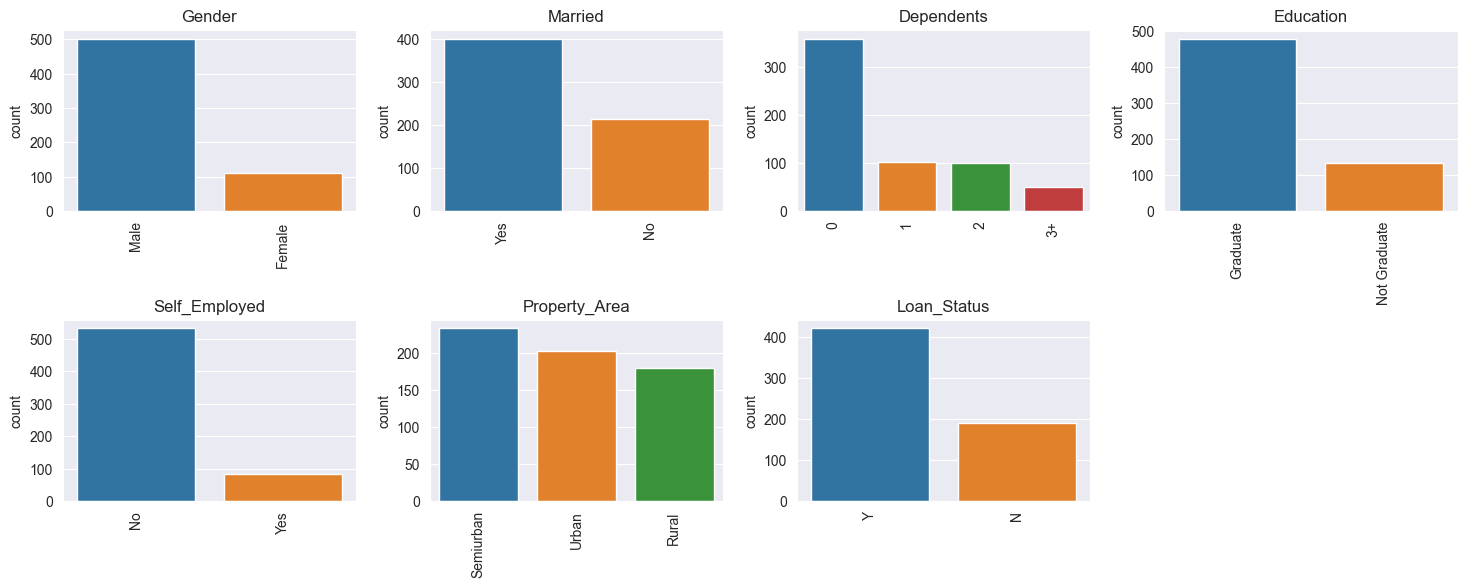

In [12]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

obj = (train_path.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,40))
index = 1

for col in object_cols:
    y = train_path[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.6,wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

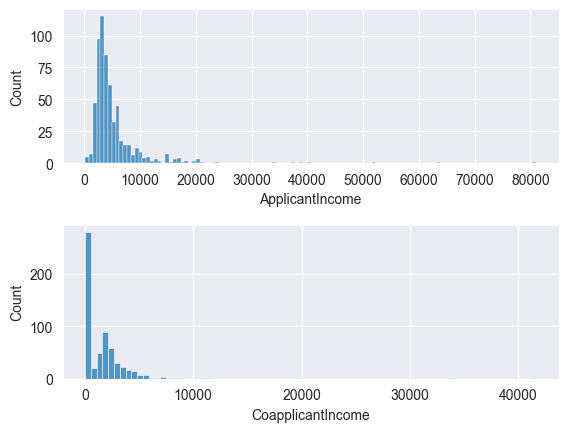

In [13]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(train_path['ApplicantIncome'],ax=axes[0,0])
plt.subplots_adjust(hspace=0.4)
sns.histplot(train_path['CoapplicantIncome'],ax=axes[1,0])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

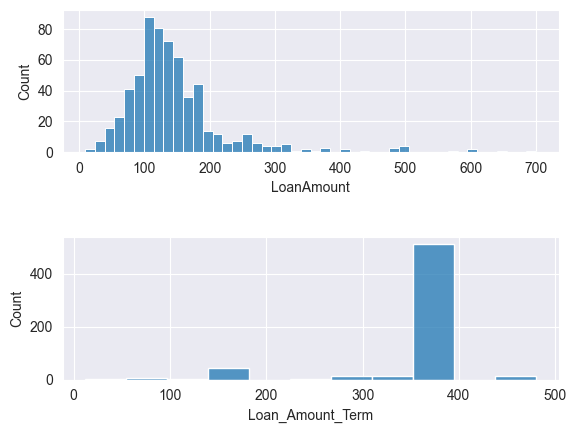

In [14]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(train_path['LoanAmount'],ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(train_path['Loan_Amount_Term'],ax=axes[1,0])

[Text(0.5, 1.0, 'Loan_Status based on Married')]

<Figure size 1000x400 with 0 Axes>

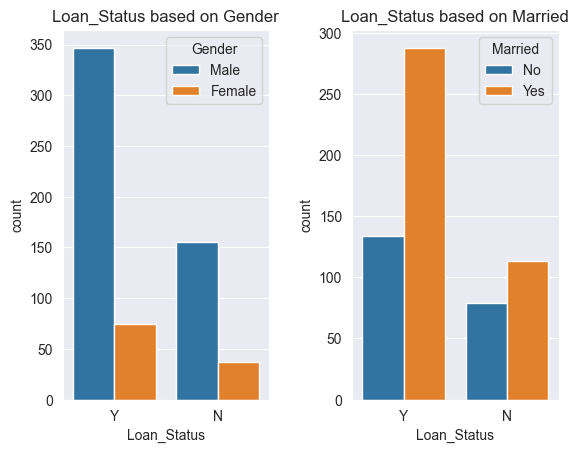

In [15]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Gender',data=train_path).set(title="Loan_Status based on Gender")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Married',data=train_path).set(title="Loan_Status based on Married")

[Text(0.5, 1.0, 'Loan_Status based on Self_Employed')]

<Figure size 1000x400 with 0 Axes>

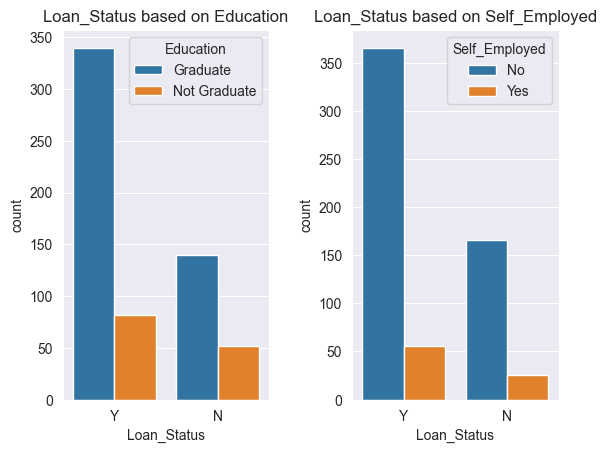

In [16]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Education',data=train_path).set(title="Loan_Status based on Education")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Self_Employed',data=train_path).set(title="Loan_Status based on Self_Employed")

[Text(0.5, 1.0, 'Loan_Status based on Property_Area')]

<Figure size 1000x400 with 0 Axes>

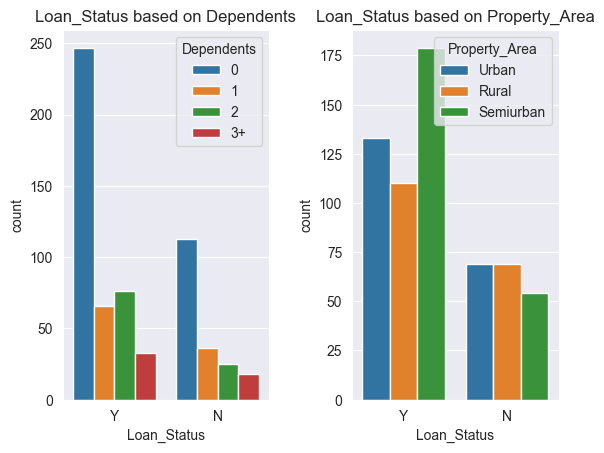

In [17]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Dependents',data=train_path).set(title="Loan_Status based on Dependents")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Property_Area',data=train_path).set(title="Loan_Status based on Property_Area")

c:\Users\keith\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


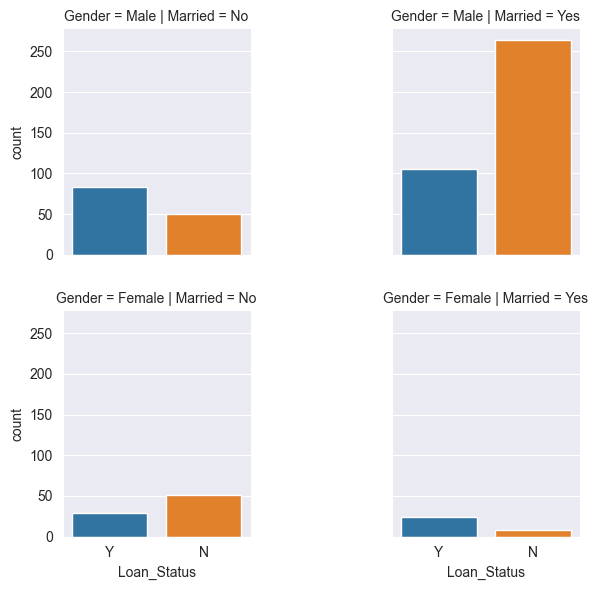

In [18]:
g = sns.FacetGrid(data=train_path,col='Married',row='Gender')

g.map(sns.countplot,'Loan_Status',palette="tab10")
plt.subplots_adjust(wspace = 0.75,hspace=0.25)

c:\Users\keith\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


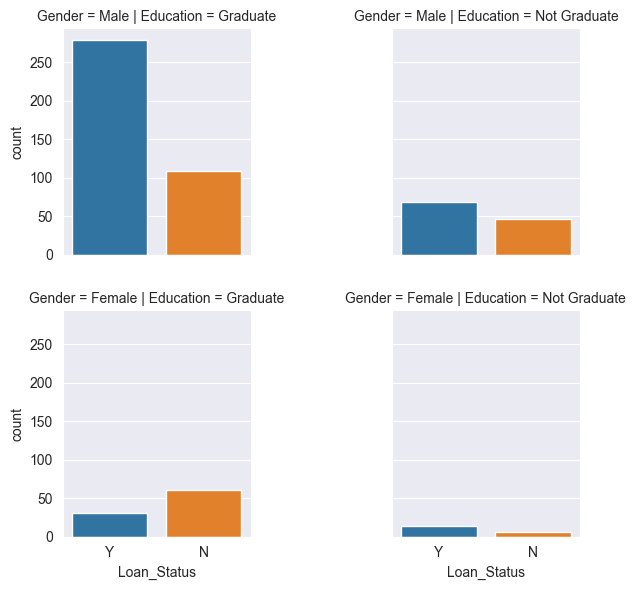

In [19]:
g = sns.FacetGrid(data=train_path,col='Education',row='Gender')

g.map(sns.countplot,'Loan_Status', palette="tab10")
plt.subplots_adjust(wspace = 0.75,hspace=0.25)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

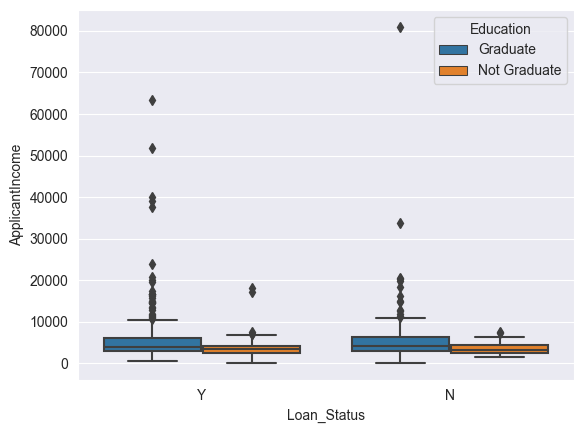

In [20]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_path,hue='Education')

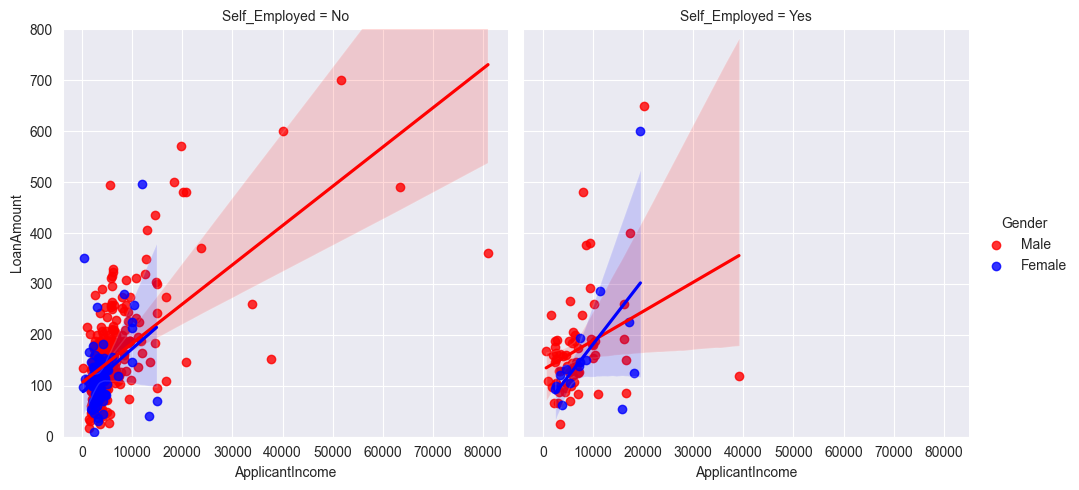

In [21]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train_path , col='Self_Employed', hue='Gender',palette= ["Red" , "Blue","Yellow"])
g.set(ylim=(0, 800))

## Encoding

In [22]:
obj = (train_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [23]:
label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
  train_path[col] = label_encoder.fit_transform(train_path[col])

In [24]:
obj = (train_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


## Correlation

<Axes: >

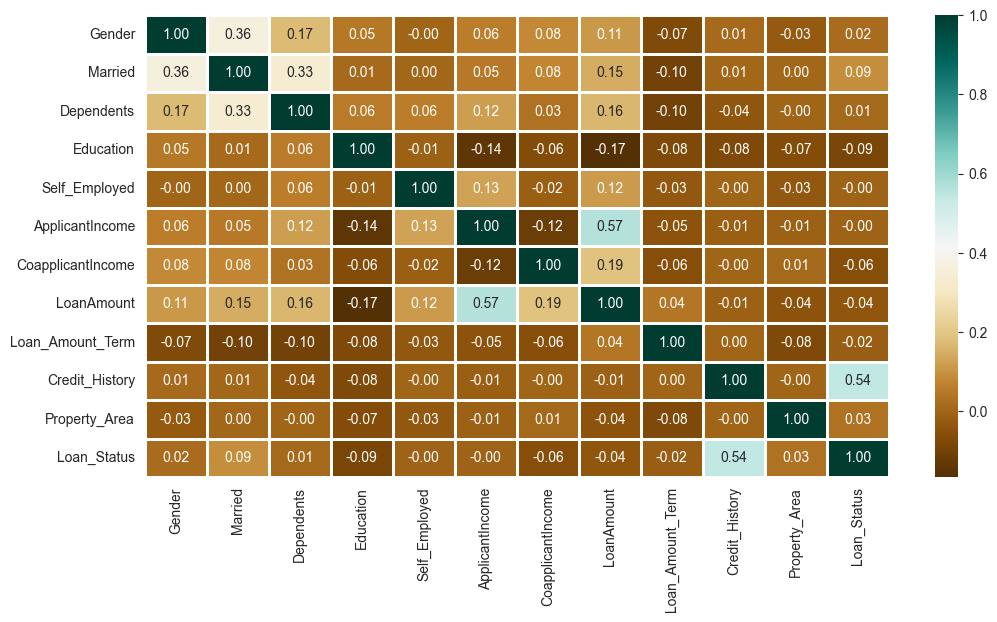

In [25]:
plt.figure(figsize=(12,6))
  
sns.heatmap(train_path.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

# Model Training

In [26]:
from sklearn.model_selection import train_test_split
  
x_status = train_path.drop(['Loan_Status'],axis=1)
y_status = train_path['Loan_Status']
x_status.shape,y_status.shape
  
x_train, x_test, y_train, y_test = train_test_split(x_status, y_status, test_size=0.4,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [27]:
#knn = KNeighborsClassifier(n_neighbors=3)
#rfc = RandomForestClassifier(n_estimators = 7)
#logr = LogisticRegression()
#linr = LinearRegression()
#svc = SVC()
#gbc = GradientBoostingClassifier()
#gaussian = GaussianNB()

In [28]:
def clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test):
    model_clf.fit(x_train, y_train)
    y_train_pred = model_clf.predict(x_train)
    y_test_pred= model_clf.predict(x_test)
    train_accuracy = model_clf.score(x_test,y_test)
    test_accuracy = model_clf.score(x_train, y_train)
    
    class_train_rep = classification_report(y_train,y_train_pred)
    
    print(model_clf.__class__.__name__, "Train :","\n",class_train_rep)
    print("r2 score of", model_clf.__class__.__name__, "=",r2_score(y_train, y_train_pred),"\n")
    print("Cross Validation Score of", model_clf.__class__.__name__, "=",np.mean(cross_val_score(model_clf,x_train,y_train,cv=5)),"\n")
    print("Training Accuracy:",train_accuracy)
    print("Testing Accuracy:", test_accuracy,"\n")
    
    class_test_rep = classification_report(y_test,y_test_pred)
    print(model_clf.__class__.__name__, "Test :","\n",class_test_rep)

    cm = confusion_matrix(y_test,y_test_pred)
    #print("Confusion Matrix: \n", cm)
    cmhm = sns.heatmap(cm,annot=True,fmt='g')
    cmhm.set_xlabel("Predicted", labelpad=20)
    cmhm.set_ylabel("Actual", labelpad=20)

### K-Nearest Neighbors Classifier

KNeighborsClassifier Train : 
               precision    recall  f1-score   support

           0       0.65      0.33      0.43       107
           1       0.77      0.93      0.84       261

    accuracy                           0.75       368
   macro avg       0.71      0.63      0.64       368
weighted avg       0.74      0.75      0.72       368

r2 score of KNeighborsClassifier = -0.1991262935510436 

Cross Validation Score of KNeighborsClassifier = 0.6930025916327286 

Training Accuracy: 0.5975609756097561
Testing Accuracy: 0.7527173913043478 

KNeighborsClassifier Test : 
               precision    recall  f1-score   support

           0       0.31      0.13      0.18        85
           1       0.65      0.84      0.73       161

    accuracy                           0.60       246
   macro avg       0.48      0.49      0.46       246
weighted avg       0.53      0.60      0.54       246



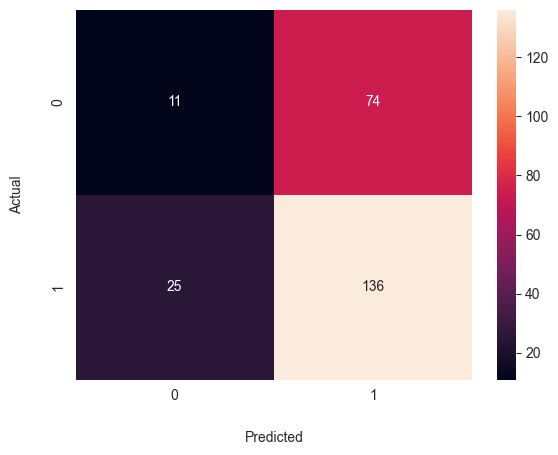

In [29]:
model_clf = KNeighborsClassifier()
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

### Random Forest Classifier

RandomForestClassifier Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       261

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

r2 score of RandomForestClassifier = 1.0 

Cross Validation Score of RandomForestClassifier = 0.8044798222880415 

Training Accuracy: 0.7845528455284553
Testing Accuracy: 1.0 

RandomForestClassifier Test : 
               precision    recall  f1-score   support

           0       0.85      0.46      0.60        85
           1       0.77      0.96      0.85       161

    accuracy                           0.78       246
   macro avg       0.81      0.71      0.72       246
weighted avg       0.80      0.78      0.76       246



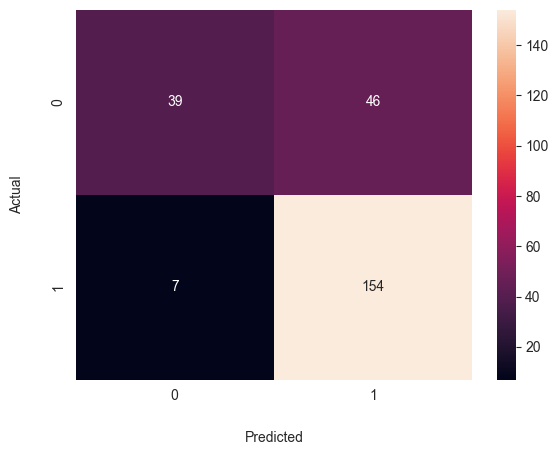

In [30]:
model_clf = RandomForestClassifier()
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

### Support Vector Classifier

SVC Train : 
               precision    recall  f1-score   support

           0       1.00      0.03      0.05       107
           1       0.72      1.00      0.83       261

    accuracy                           0.72       368
   macro avg       0.86      0.51      0.44       368
weighted avg       0.80      0.72      0.61       368

r2 score of SVC = -0.3704300497726214 

Cross Validation Score of SVC = 0.7092558311736393 

Training Accuracy: 0.6504065040650406
Testing Accuracy: 0.717391304347826 

SVC Test : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.65      0.99      0.79       161

    accuracy                           0.65       246
   macro avg       0.33      0.50      0.39       246
weighted avg       0.43      0.65      0.52       246



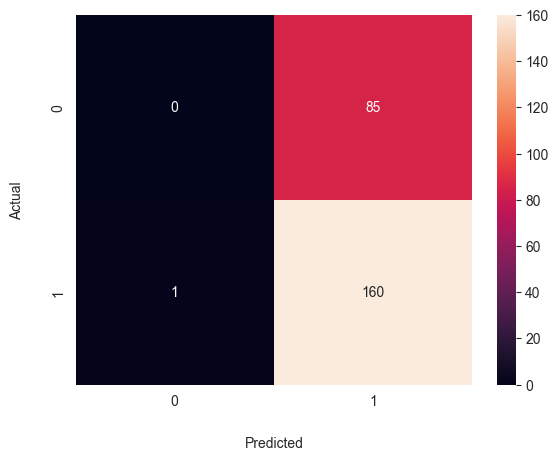

In [31]:
model_clf = SVC()
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

### Random Forest Classifier (ignore this)

RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.96      0.26      0.41        85
           1       0.72      0.99      0.83       161

    accuracy                           0.74       246
   macro avg       0.84      0.63      0.62       246
weighted avg       0.80      0.74      0.69       246

r2 score of RandomForestClassifier = -0.15045670442089887 

Cross Validation Score of RandomForestClassifier = 0.7853017400962605 

Training Accuracy: 0.7398373983739838
Testing Accuracy: 0.8233695652173914 

RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.96      0.41      0.58       107
           1       0.80      0.99      0.89       261

    accuracy                           0.82       368
   macro avg       0.88      0.70      0.73       368
weighted avg       0.85      0.82      0.80       368



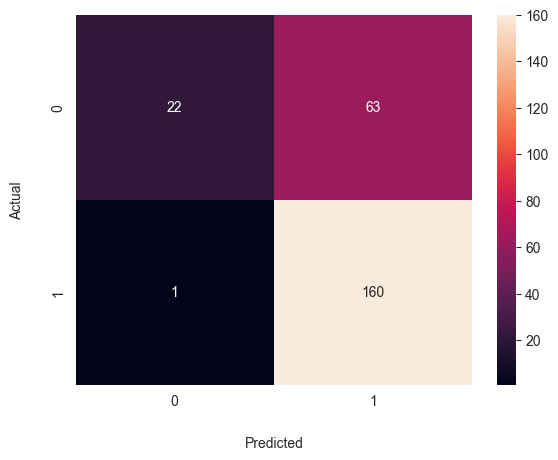

In [32]:
model_clf = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7,max_features=1)
clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test)

# Testing the Model

In [54]:
test_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
test_path.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [56]:
test_path ['Gender'] = test_path ['Gender'].fillna(test_path['Gender'].mode()[0])
test_path ['Married'] = test_path ['Married'].fillna(test_path['Married'].mode()[0])
test_path ['Dependents'] = test_path ['Dependents'].fillna(test_path['Dependents'].mode()[0])
test_path ['Self_Employed'] = test_path ['Self_Employed'].fillna(test_path['Self_Employed'].mode()[0])

In [57]:
test_path ['LoanAmount'] = test_path ['LoanAmount'].fillna(test_path['LoanAmount'].mean())
test_path ['Loan_Amount_Term'] = test_path ['Loan_Amount_Term'].fillna(test_path['Loan_Amount_Term'].mean())
test_path ['Credit_History'] = test_path ['Credit_History'].fillna(test_path['Credit_History'].mean())

In [58]:
test_path.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [59]:
label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
for col in cols:
  test_path[col] = label_encoder.fit_transform(test_path[col])

In [60]:
test_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [61]:
test_path.drop(['Loan_ID'],axis=1,inplace=True)

In [62]:
pred_lr = logr.predict(test_path)

In [63]:
pred_rfc = rfc.predict(test_path)

In [64]:
predict = np.zeros((test_path.shape[0]))

for i in range(0,test_path.shape[0]):
    temp = pred_lr[i] + pred_rfc[i]
    if temp>=2:
        predict[i] = 1
predict = predict.astype('int')

In [65]:
test_path = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [66]:
test_path['Loan_Status'] = predict

In [67]:
test_path['Loan_Status'] = test_path['Loan_Status'].map({0:'N', 1:'Y'})


In [68]:
test_path.to_csv('results.csv', index=False)